In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,6)

## Training data & Test data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
final_df = pd.concat([train_df,test_df],axis=0)

In [6]:
final_df.shape

(2919, 81)

<AxesSubplot:>

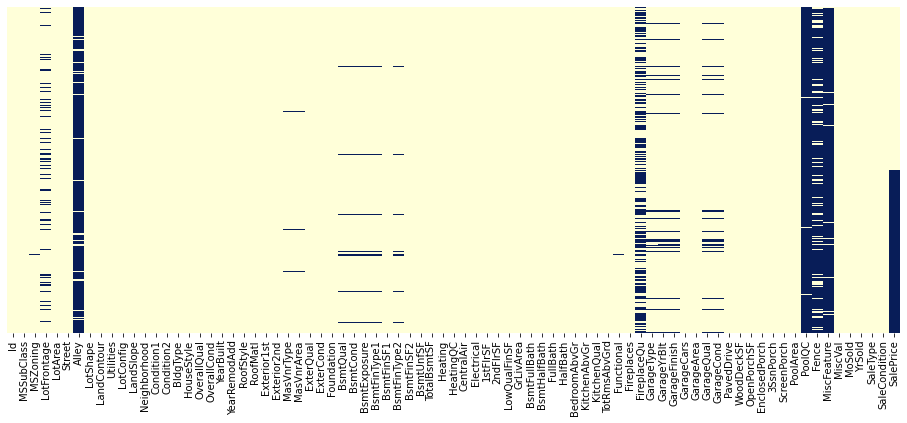

In [7]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## Missing values filling

#### Numerical NA values are filled with `mean()`

In [9]:
final_df['LotFrontage'] = final_df['LotFrontage'].fillna(final_df['LotFrontage'].mean())
final_df['MasVnrArea'] = final_df['MasVnrArea'].fillna(final_df['MasVnrArea'].mean())
final_df['GarageArea'] = final_df['GarageArea'].fillna(final_df['GarageArea'].mean())
final_df['BsmtFinSF1'] = final_df['BsmtFinSF1'].fillna(final_df['BsmtFinSF1'].mean())
final_df['BsmtFinSF2'] = final_df['BsmtFinSF2'].fillna(final_df['BsmtFinSF2'].mean())
final_df['BsmtUnfSF'] = final_df['BsmtUnfSF'].fillna(final_df['BsmtUnfSF'].mean())
final_df['TotalBsmtSF'] = final_df['TotalBsmtSF'].fillna(final_df['TotalBsmtSF'].mean())

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

#### Categorical NA values are filled with `mode()`

In [11]:
final_df['BsmtCond'] = final_df['BsmtCond'].fillna(final_df['BsmtCond'].mode()[0])
final_df['BsmtQual'] = final_df['BsmtQual'].fillna(final_df['BsmtQual'].mode()[0])
final_df['FireplaceQu'] = final_df['FireplaceQu'].fillna(final_df['FireplaceQu'].mode()[0])
final_df['GarageType'] = final_df['GarageType'].fillna(final_df['GarageType'].mode()[0])
final_df['GarageFinish'] = final_df['GarageFinish'].fillna(final_df['GarageFinish'].mode()[0])
final_df['GarageCond'] = final_df['GarageCond'].fillna(final_df['GarageCond'].mode()[0])
final_df['GarageQual'] = final_df['GarageQual'].fillna(final_df['GarageQual'].mode()[0])
final_df['BsmtExposure'] = final_df['BsmtExposure'].fillna(final_df['BsmtExposure'].mode()[0])
final_df['MasVnrType'] = final_df['MasVnrType'].fillna(final_df['MasVnrType'].mode()[0])
final_df['BsmtFinType2'] = final_df['BsmtFinType2'].fillna(final_df['BsmtFinType2'].mode()[0])
final_df['BsmtFinType1'] = final_df['BsmtFinType1'].fillna(final_df['BsmtFinType1'].mode()[0])
final_df['Electrical'] = final_df['Electrical'].fillna(final_df['Electrical'].mode()[0])
final_df['MSZoning'] = final_df['MSZoning'].fillna(final_df['MSZoning'].mode()[0])
final_df['Utilities'] = final_df['Utilities'].fillna(final_df['Utilities'].mode()[0])
final_df['Exterior1st'] = final_df['Exterior1st'].fillna(final_df['Exterior1st'].mode()[0])
final_df['Exterior2nd'] = final_df['Exterior2nd'].fillna(final_df['Exterior2nd'].mode()[0])
final_df['KitchenQual'] = final_df['KitchenQual'].fillna(final_df['KitchenQual'].mode()[0])
final_df['Functional'] = final_df['Functional'].fillna(final_df['Functional'].mode()[0])
final_df['SaleType'] = final_df['SaleType'].fillna(final_df['SaleType'].mode()[0])
final_df['GarageCars'] = final_df['GarageCars'].fillna(final_df['GarageCars'].mode()[0])
final_df['BsmtFullBath'] = final_df['BsmtFullBath'].fillna(final_df['BsmtFullBath'].mode()[0])
final_df['BsmtHalfBath'] = final_df['BsmtHalfBath'].fillna(final_df['BsmtHalfBath'].mode()[0])

In [12]:
final_df.shape

(2919, 81)

## Not so important + insufficient columns deleting

In [13]:
final_df.drop(['Id','PoolQC','Fence','MiscFeature','Alley','GarageYrBlt'], axis=1, inplace=True)

In [14]:
final_df.shape

(2919, 75)

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

### Categorical Features Handling: Function for finding `object` columns

In [16]:
c_list = [i for i in final_df.columns if final_df[i].dtype=='object']
c_list

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [17]:
def onehot_cols(cols):
    df_final = final_df
    i = 0
    for c in cols:
        print(c)
        df1 = pd.get_dummies(final_df[c], drop_first=True)
        final_df.drop([c], axis=1, inplace=True)
        if i == 0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final,df1], axis=1)
        i = i+1
    df_final = pd.concat([final_df, df_final], axis=1)
    return df_final

In [18]:
final_df = onehot_cols(c_list)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [19]:
final_df.shape

(2919, 236)

In [20]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(2919, 176)

In [22]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


<AxesSubplot:>

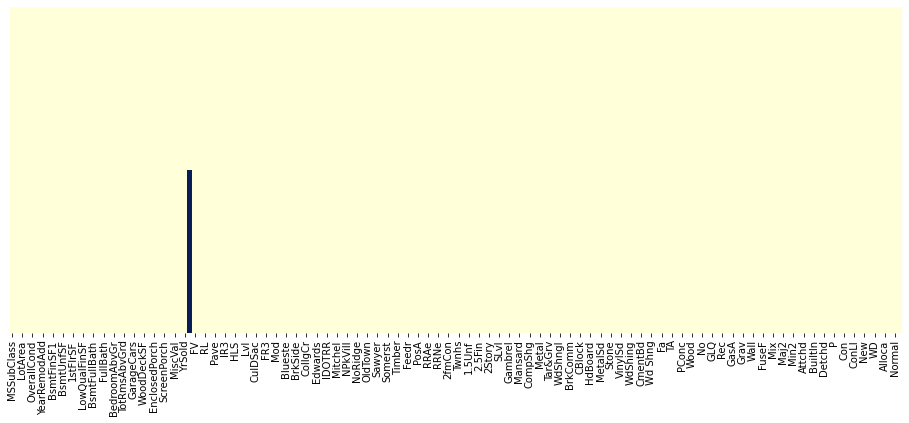

In [23]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

## ML section

### Train data & Test data

In [24]:
df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1460:,:]

In [25]:
df_test.drop(['SalePrice'], axis=1, inplace=True);

C:\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
df_test.shape

(1459, 175)

In [27]:
x_train = df_train.drop(['SalePrice'], axis=1)
y_train = df_train['SalePrice']

In [28]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib as jb

In [29]:
classifier = GradientBoostingRegressor()
classifier.fit(x_train, y_train)
filename = 'gb_model1.pkl'
jb.dump(classifier, filename)
y_pred = classifier.predict(df_test)
y_pred

array([121085.2639012 , 157236.44148825, 182364.57636184, ...,
       178604.74963401, 124812.60426122, 239921.81395679])

In [30]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'],pred], axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('submission_gb.csv',index=False)

In [31]:
classifier2 = GradientBoostingRegressor(n_estimators=200)

In [32]:
classifier2.fit(x_train, y_train)
filename = 'gb_model2.pkl'
jb.dump(classifier2, filename)
y_pred2 = classifier2.predict(df_test)
y_pred2

array([120012.87836464, 157105.33948226, 185645.41605609, ...,
       177756.44876068, 124393.24307864, 238869.37301236])

In [33]:
pred2 = pd.DataFrame(y_pred2)
dataset2 = pd.concat([sub_df['Id'],pred2], axis=1)
dataset2.columns = ['Id','SalePrice']
dataset2.to_csv('submission_gb2.csv',index=False)

In [34]:
classifier3 = RandomForestRegressor()
classifier3.fit(x_train, y_train)
filename = 'rf_model.pkl'
jb.dump(classifier3, filename)
y_pred3 = classifier3.predict(df_test)
y_pred3

array([129226.58, 157820.  , 184437.4 , ..., 159450.87, 115532.96,
       229325.05])

In [35]:
pred3 = pd.DataFrame(y_pred3)
dataset3 = pd.concat([sub_df['Id'],pred3], axis=1)
dataset3.columns = ['Id','SalePrice']
dataset3.to_csv('submission_rf.csv',index=False)

In [36]:
classifier4 = AdaBoostRegressor()
classifier4.fit(x_train, y_train)
filename = 'ab_model.pkl'
jb.dump(classifier4, filename)
y_pred4 = classifier4.predict(df_test)
y_pred4

array([122374.35067437, 140566.94814815, 178385.62331839, ...,
       157846.617866  , 140566.94814815, 231022.71910112])

In [37]:
pred4 = pd.DataFrame(y_pred4)
dataset4 = pd.concat([sub_df['Id'],pred4], axis=1)
dataset4.columns = ['Id','SalePrice']
dataset4.to_csv('submission_ab.csv',index=False)

In [39]:
classifier5 = GradientBoostingRegressor(n_estimators=300)
classifier5.fit(x_train, y_train)
filename = 'gb_model3.pkl'
jb.dump(classifier5, filename)
y_pred5 = classifier5.predict(df_test)
y_pred5

array([119423.68865258, 157952.78960442, 186427.06570317, ...,
       176027.30649636, 124369.11010377, 238896.33332536])

In [40]:
pred5 = pd.DataFrame(y_pred5)
dataset5 = pd.concat([sub_df['Id'],pred5], axis=1)
dataset5.columns = ['Id','SalePrice']
dataset5.to_csv('submission_gb3.csv',index=False)

In [44]:
classifier6 = GradientBoostingRegressor(n_estimators=1000)
classifier6.fit(x_train, y_train)
filename = 'gb_model4.pkl'
jb.dump(classifier6, filename)
y_pred6 = classifier6.predict(df_test)
pred6 = pd.DataFrame(y_pred6)
dataset6 = pd.concat([sub_df['Id'],pred6], axis=1)
dataset6.columns = ['Id','SalePrice']
dataset6.to_csv('submission_gb4.csv',index=False)

In [46]:
classifier7 = GradientBoostingRegressor(n_estimators=5000)
classifier7.fit(x_train, y_train)
filename = 'gb_model5.pkl'
jb.dump(classifier7, filename)
y_pred7 = classifier7.predict(df_test)
pred7 = pd.DataFrame(y_pred7)
dataset7 = pd.concat([sub_df['Id'],pred7], axis=1)
dataset7.columns = ['Id','SalePrice']
dataset7.to_csv('submission_gb5.csv',index=False)

In [47]:
for i in [datasets,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7]:
    mae = mean_absolute_error(sub_df.SalePrice, i.SalePrice)
    print(f"MAE of {i}: ",mae)

MAE of         Id      SalePrice
0     1461  121085.263901
1     1462  157236.441488
2     1463  182364.576362
3     1464  179560.386702
4     1465  193113.656392
...    ...            ...
1454  2915   83964.257853
1455  2916   86803.436943
1456  2917  178604.749634
1457  2918  124812.604261
1458  2919  239921.813957

[1459 rows x 2 columns]:  54435.81405711217
MAE of         Id      SalePrice
0     1461  120012.878365
1     1462  157105.339482
2     1463  185645.416056
3     1464  184304.345362
4     1465  189423.083578
...    ...            ...
1454  2915   81489.245407
1455  2916   76372.700745
1456  2917  177756.448761
1457  2918  124393.243079
1458  2919  238869.373012

[1459 rows x 2 columns]:  54940.03789074408
MAE of         Id  SalePrice
0     1461  129226.58
1     1462  157820.00
2     1463  184437.40
3     1464  183214.00
4     1465  203421.21
...    ...        ...
1454  2915   83773.50
1455  2916   87248.50
1456  2917  159450.87
1457  2918  115532.96
1458  2919  229325.05

